<a href="https://colab.research.google.com/github/LuisHiram99/trabajos_PLN/blob/main/Notebooks/04-Frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>El papel de la frecuencia en el NLP y tareas relacionadas</h1>

En esta notebook exploraremos las leyes de Zipf y Benford. Experimentaremos con varios textos y datasets para ver si cumplen dichas leyes.

#1. La ley de Zipf

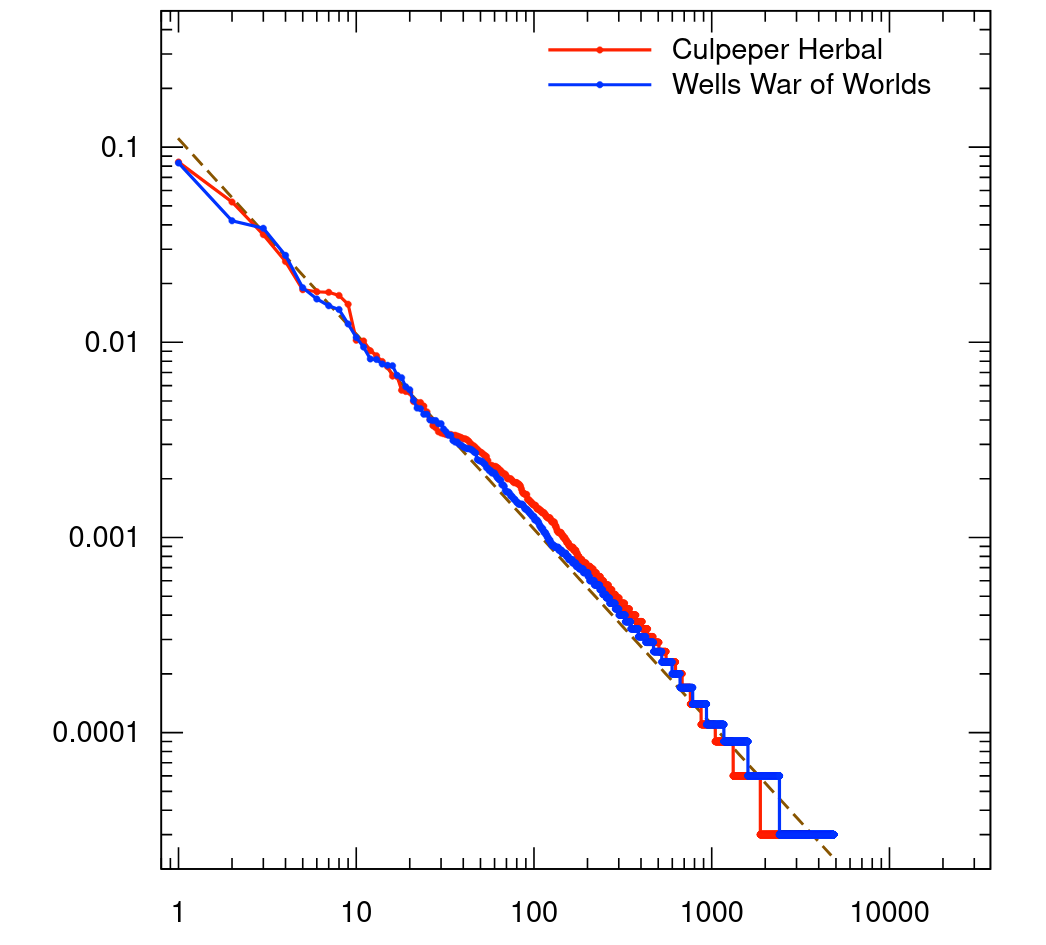

## Miembros equipo:
### Jehú Jonathán Ramírez Ramírez
### Luis Hiram Hernández Gutiérrez

<h3>⭕ Instrucciones</h3>

1. Baja el dataset Gutenberg


In [2]:
!gdown 1yIFRLN1Njy8KE_QIXEY44bh7s6GdLX2N

Downloading...
From (original): https://drive.google.com/uc?id=1yIFRLN1Njy8KE_QIXEY44bh7s6GdLX2N
From (redirected): https://drive.google.com/uc?id=1yIFRLN1Njy8KE_QIXEY44bh7s6GdLX2N&confirm=t&uuid=0aac755a-f62e-464d-8e0a-28bbeabd8486
To: /content/gutenberg_data_1000.csv
100% 468M/468M [00:09<00:00, 49.6MB/s]


2. Escoge un documento aleatorio

In [3]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('/content/gutenberg_data_1000.csv',index_col=0)

idx = np.random.choice(data_df.index.to_list(),size=1)[0]
text = data_df.loc[idx,'Text']

print(f"Índice: {idx},\n\t{text[:150]}")

Índice: 3,
	FROM: THE PRESIDENT OF THE NATIONAL TEACHERS' ASSOCIATION. _STATE OF NEW YORK_ _Department of Public Instruction_ _SUPERINTENDENT'S OFFICE_ _Albany_ D


3. Haz un breve análisis exploratorio del texto.

In [4]:
text

'FROM: THE PRESIDENT OF THE NATIONAL TEACHERS\' ASSOCIATION. _STATE OF NEW YORK_ _Department of Public Instruction_ _SUPERINTENDENT\'S OFFICE_ _Albany_ December 26, 1896. [Illustration: (seal)] _Stenographic Letter_ Dictated by __________ W. E. Watt, President &c., Fisher Building, 277 Dearborn St., Chicago, Ill. My dear Sir: Please accept my thanks for a copy of the first publication of "Birds." Please enter my name as a regular subscriber. It is one of the most beautiful and interesting publications yet attempted in this direction. It has other attractions in addition to its beauty, and it must win its way to popular favor. Wishing the handsome little magazine abundant prosperity, I remain Yours very respectfully, [signature] State Superintendent. * * * * * Vol. 1. No. 1. JANUARY, 1897. PRICE 15 CENTS: $1.50 A YEAR. ONCE A MONTH. BIRDS ILLUSTRATED BY COLOR PHOTOGRAPHY [Illustration: NONPAREIL.] NATURE STUDY PUBLISHING COMPANY OFFICE: FISHER BUILDING CHICAGO BIRDS ILLUSTRATED BY COLOR

3. Quita solamente signos de puntuación y tokeniza. **No quites stopwords** ni realices preprocesamiento adicional.

In [ ]:
!pip install spacy

In [6]:
import spacy
from string import punctuation
punctuations = list(punctuation)
nlp = spacy.load('en_core_web_sm')
text_nlp = nlp(text)
text_tokens = [t.text for t in text_nlp]
text_wo_punctuations = [token for token in text_tokens if token not in punctuations and token != " "]
print("-------------Removing punctuations-----------------------")
print(text_wo_punctuations)

-------------Removing punctuations-----------------------
['FROM', 'THE', 'PRESIDENT', 'OF', 'THE', 'NATIONAL', 'TEACHERS', 'ASSOCIATION', 'STATE', 'OF', 'NEW', 'YORK', 'Department', 'of', 'Public', 'Instruction', 'SUPERINTENDENT', "'S", 'OFFICE', 'Albany', 'December', '26', '1896', 'Illustration', 'seal', 'Stenographic', 'Letter', 'Dictated', 'by', 'W.', 'E.', 'Watt', 'President', 'c.', 'Fisher', 'Building', '277', 'Dearborn', 'St.', 'Chicago', 'Ill.', 'My', 'dear', 'Sir', 'Please', 'accept', 'my', 'thanks', 'for', 'a', 'copy', 'of', 'the', 'first', 'publication', 'of', 'Birds', 'Please', 'enter', 'my', 'name', 'as', 'a', 'regular', 'subscriber', 'It', 'is', 'one', 'of', 'the', 'most', 'beautiful', 'and', 'interesting', 'publications', 'yet', 'attempted', 'in', 'this', 'direction', 'It', 'has', 'other', 'attractions', 'in', 'addition', 'to', 'its', 'beauty', 'and', 'it', 'must', 'win', 'its', 'way', 'to', 'popular', 'favor', 'Wishing', 'the', 'handsome', 'little', 'magazine', 'abundan

4. Haz un conteo de las palabras (tokens) más frecuentes y obten los 15 más frecuentes. Imprimelos, junto con sus frecuencias.<br>
 *Una opción es usar la clase [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) del módulo `collections`.*

In [8]:
from collections import Counter

word_counter = Counter(text_wo_punctuations)
word_counter.most_common(15)

[('the', 472),
 ('and', 284),
 ('of', 262),
 ('a', 198),
 ('in', 172),
 ('to', 170),
 ('I', 148),
 ('is', 103),
 ('are', 80),
 ('it', 74),
 ('on', 63),
 ('as', 59),
 ('that', 57),
 ('The', 56),
 ('their', 51)]

5. Usando matplotlib, haz un gráfico de barras mostrando la frecuencia de cada una de las 15 palabras (tokens) más frecuentes, de mayor a menor. Toma como referencia el ejemplo a continuación.

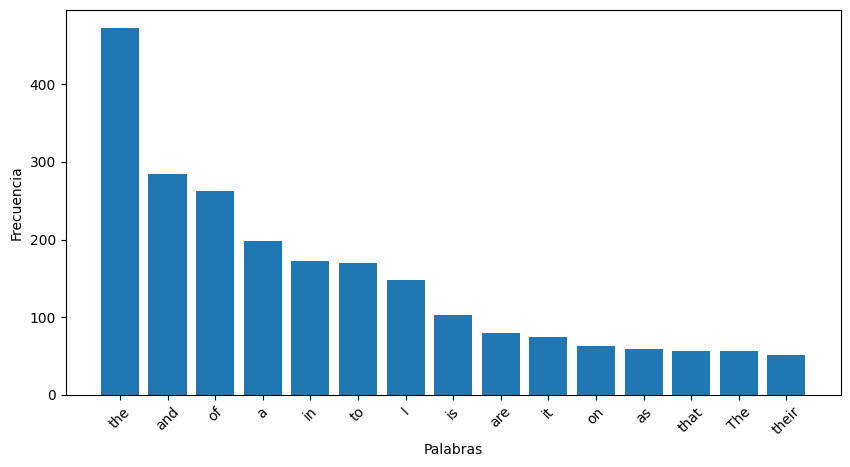

In [10]:
import matplotlib.pyplot as plt
most_common = word_counter.most_common(15)
words, frequencies = zip(*most_common)


plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)

plt.show()



#2. La ley de Benford

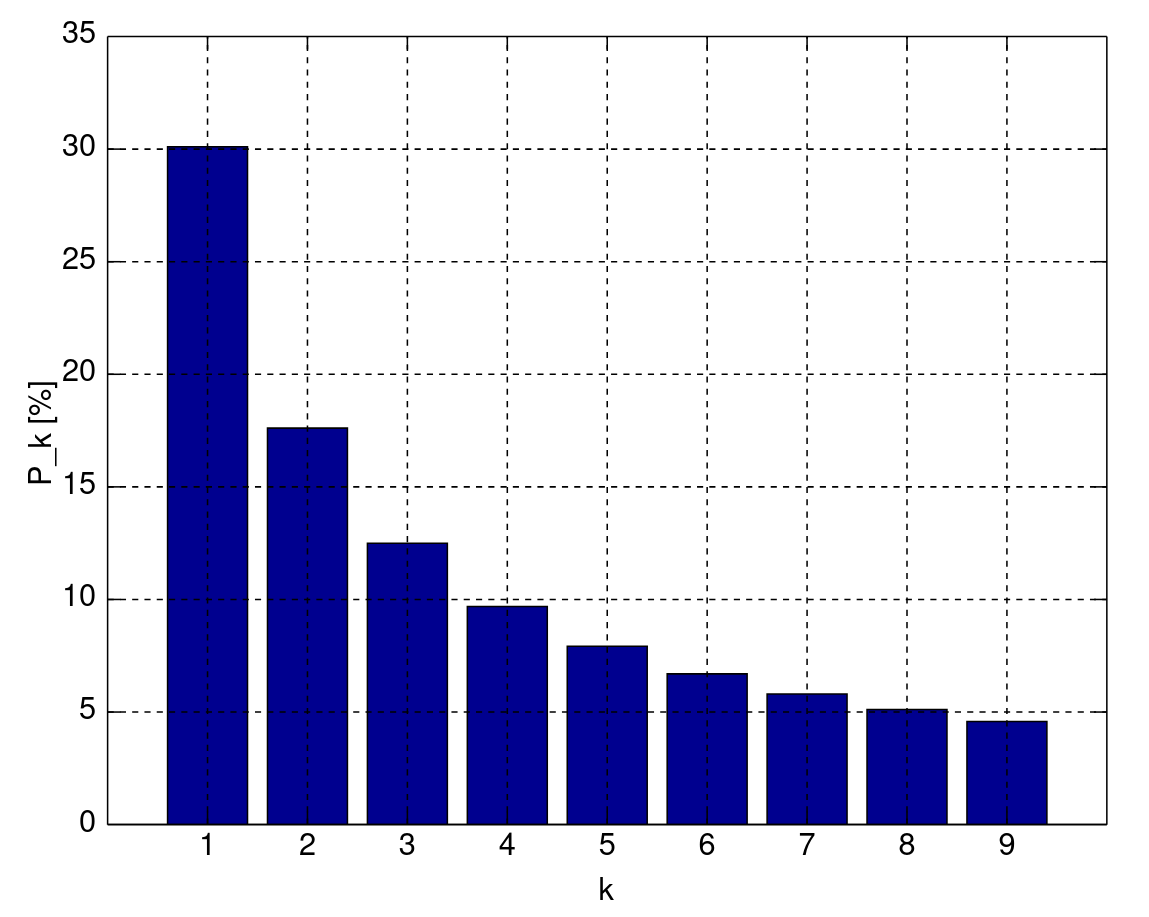

Escoger dos datasets diferentes de los siguientes:

* **Dataset de precios de carros**
        1XCzTrZ5HkiNHI3hjSTthJCOEhI5hZLOq

* **Dataset de riesgo cardiaco**
        1tM5A_UwOjg2EWLqUYW3BmNZ60FaF75Y_

* **Dataset de precios de laptops**
        1whDUO7N6ztt4bEVDakhBQOOLCWtFxo_g

* **Dataset de información demográfica de condados de EUA**
        1VKscxrqu-SijA46jvcQXc-4J9syqqkNe



En cada uno de ellos, realiza los siguiente:

1. Baja el archivo con la instrucción `!gdown` y el id del respectivo dataset.
2. Abre el dataset usando pandas, es un dataframe. Visualiza el dataframe.
3. Escoge una columna que tenga valores *float*, guarda la columna en un arreglo de numpy o lista.
4. Obten el primer dígito de cada valor del arreglo y guarda, **sólo este primer dígito** en otro arreglo. Si prefieres, para hacer esto, puedes usar la función `obtener_leading_digit()` definida más abajo.
5. Haz un conteo de frecuencias de cada dígito del arreglo obtenido en el punto anterior.
6. Grafica, con matplotlib, un gráfico de barras mostrando, de mayor a menor, las frecuencias de cada dígito. El gráfico debe tener como título el dataset y la columna de valores mostrada.
7. Finalmente, concluye y escribe si percibes que tu gráfica se parece a la gráfica de la ley de Benford.

In [11]:
def obtener_leading_digit(numero):
    return int(str(numero)[0])

In [12]:
!gdown 1XCzTrZ5HkiNHI3hjSTthJCOEhI5hZLOq

Downloading...
From: https://drive.google.com/uc?id=1XCzTrZ5HkiNHI3hjSTthJCOEhI5hZLOq
To: /content/car_price_dataset.csv
100% 565k/565k [00:00<00:00, 100MB/s]


Leer el dataframe con pandas

In [13]:
import pandas as pd

path = "/content/car_price_dataset.csv"

data_df = pd.read_csv(path)
data_df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [20]:
values = list(data_df["Engine_Size"])
first_digit = [obtener_leading_digit(i) for i in values]
counter = Counter(first_digit)
counter

Counter({4: 2508, 2: 2504, 3: 2521, 1: 2364, 5: 103})

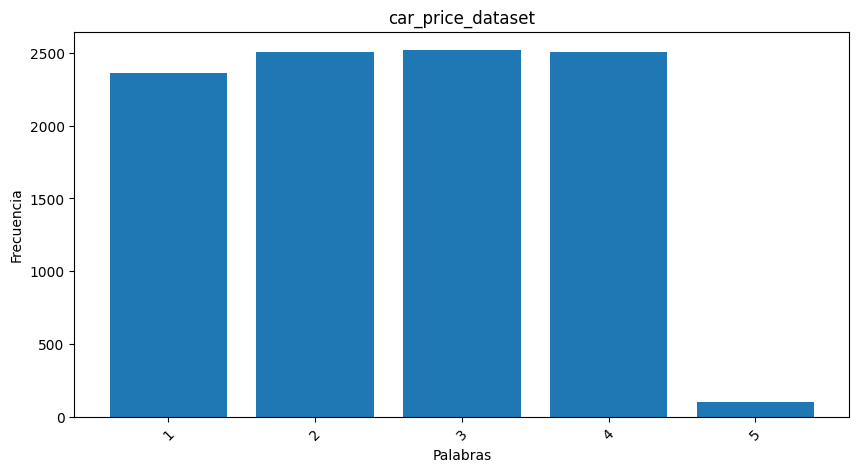

In [24]:
import matplotlib.pyplot as plt
words, frequencies = zip(*counter.most_common())


plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("car_price_dataset")
plt.xticks(rotation=45)

plt.show()



In [25]:
!gdown 1whDUO7N6ztt4bEVDakhBQOOLCWtFxo_g

Downloading...
From: https://drive.google.com/uc?id=1whDUO7N6ztt4bEVDakhBQOOLCWtFxo_g
To: /content/laptop_prices.csv
100% 972k/972k [00:00<00:00, 82.9MB/s]


In [33]:
import pandas as pd

path = "/content/laptop_prices.csv"

data_df = pd.read_csv(path)
print(data_df.columns)
data_df.head()

Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')


,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [37]:
values = list(data_df["Weight (kg)"])
values
first_digit = [obtener_leading_digit(i) for i in values]
first_digit
counter = Counter(first_digit)
counter

Counter({1: 4111, 2: 5153, 3: 2504})

(2, 1, 3)


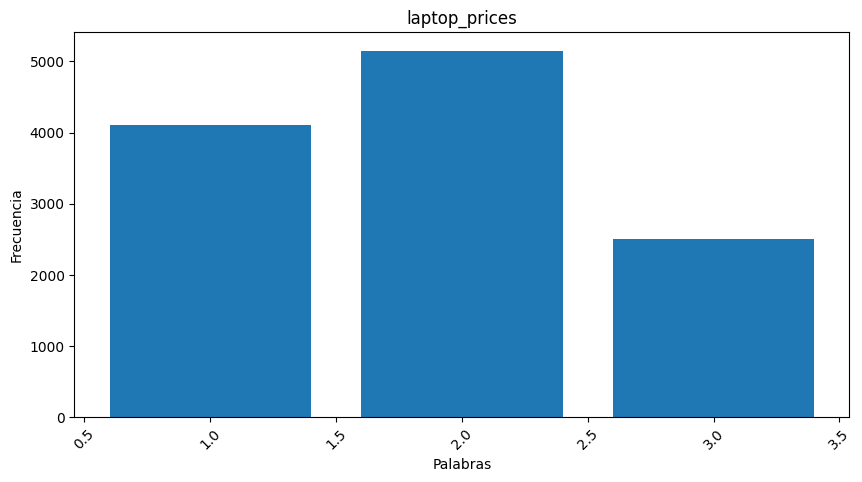

In [41]:
words, frequencies = zip(*counter.most_common())

print(words)
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("laptop_prices")
plt.xticks(rotation=45)

plt.show()

#3. Valores inventados

In [ ]:
!gdown

In [45]:
import pandas as pd

data_df = pd.read_excel("/content/Gastos.xlsx",index_col=0)
data_df

,valor 1,valor 2,valor 3,valor 4,valor 5
ARREOLA MONTESINOS JOSE ALFREDO,1500.00,6000.00,1300.00,4500.00,8500.00
BALDERRAMA DOMINGUEZ GAEL,15152.00,1512.00,2124.00,11120.00,5.00
CASTRO LERMA MARIO ALEJANDRO,1300.00,750.00,10000.00,6000.00,25.00
DURAZO BARTOLINI ANGEL DAVID,923.22,2329.22,194.32,231.89,123.54
FLORES ALVAREZ CHRISTIAN ALEXIS,30999.99,8500.00,1.00,16.00,380.00
FLORES BRIONES JESUS ANTONIO,25000.00,1500.00,3000.00,25.00,420.00
GARCIA RUIZ JUAN DANIEL,1230.00,4000.00,120.00,800.00,560.00
GONZALEZ ARGUELLES PABLO ANDRES,1500.00,450.00,20.00,160.00,700.00
GUTIERREZ NAVARRO GUSTAVO,1099.99,500.00,750.00,436.00,794.00
HERNANDEZ GUTIERREZ LUIS HIRAM,1527.00,2350.00,1708.00,2500.00,5400.00


In [46]:
from collections import Counter

values = data_df.values
values = values.flatten()
values = [int(str(x)[0]) for x in values]
values_counter = Counter(values)

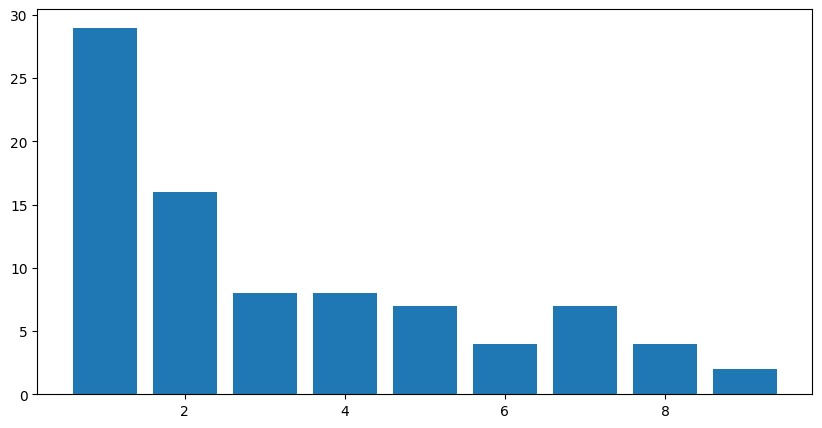

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(*zip(*values_counter.most_common()))
plt.show()

# Conclusiones:
Para las primeras dos tablas no parece que siga una distribución parecida de Zipf o Benford. Sin embargo, con los valores aleatorios parece que si sigue la distribución cosa que se nos hace curiosa al ser valor inventados y que no siguen ningún orden lógico